Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



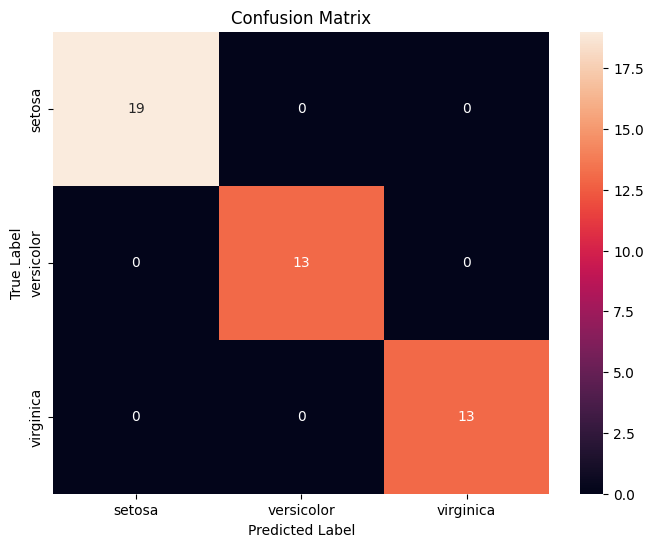

In [1]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Create confusion matrix visualization
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', 
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Precision:
Precision is the ratio of correctly predicted positive observations to the total predicted positives
Formula: Precision = True Positives / (True Positives + False Positives)

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import numpy as np

# Load data
iris = load_iris()
X = iris.data
y = iris.target

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Get predictions
y_pred = rf_classifier.predict(X_test)

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate precision for each class manually
for i in range(3):
    true_positives = cm[i][i]
    false_positives = sum(cm[:,i]) - cm[i][i]
    precision = true_positives / (true_positives + false_positives)
    print(f"\nClass {iris.target_names[i]}:")
    print(f"True Positives: {true_positives}")
    print(f"False Positives: {false_positives}")
    print(f"Precision: {precision:.3f}")

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Class setosa:
True Positives: 19
False Positives: 0
Precision: 1.000

Class versicolor:
True Positives: 13
False Positives: 0
Precision: 1.000

Class virginica:
True Positives: 13
False Positives: 0
Precision: 1.000


Understanding Confusion Matrix
Assume we get this confusion matrix:

[[15  0  0]
 [ 0 13  2]
 [ 0  1 14]]

Where rows represent actual classes and columns represent predicted classes:
Setosa (0)
Versicolor (1)
Virginica (2)

Precision Calculation for Each Class
Setosa (Class 0)
True Positives (TP) = 15 (correctly predicted Setosa)
False Positives (FP) = 0 + 0 = 0 (other flowers predicted as Setosa)

Precision = TP / (TP + FP)
         = 15 / (15 + 0)
         = 15/15
         = 1.0 (100%)

Versicolor (Class 1)
True Positives (TP) = 13 (correctly predicted Versicolor)
False Positives (FP) = 0 + 1 = 1 (other flowers predicted as Versicolor)

Precision = TP / (TP + FP)
         = 13 / (13 + 1)
         = 13/14
         ≈ 0.929 (92.9%)

Virginica (Class 2)
?????

True Positives (TP) = 14 (correctly predicted Virginica)
False Positives (FP) = 2 + 0 = 2 (other flowers predicted as Virginica)

Precision = TP / (TP + FP) <br>
         = 14 / (14 + 2) <br>
         = 14/16 <br>
         = 0.875 (87.5%)

Recall (Sensitivity)
Measures the model's ability to identify all positive instance

Recall Calculation for Each Class
Setosa (Class 0)

True Positives (TP) = 15 (correctly predicted Setosa)
False Negatives (FN) = 0 + 0 = 0 (Setosa flowers predicted as other classes)

Recall = TP / (TP + FN)
       = 15 / (15 + 0)
       = 15/15
       = 1.0 (100%)

Versicolor (Class 1)
True Positives (TP) = 13 (correctly predicted Versicolor)
False Negatives (FN) = 0 + 2 = 2 (Versicolor flowers predicted as other classes)

Recall = TP / (TP + FN)
       = 13 / (13 + 2)
       = 13/15
       ≈ 0.867 (86.7%)

Virginica (Class 2)
True Positives (TP) = 14 (correctly predicted Virginica)
False Negatives (FN) = 1 + 0 = 1 (Virginica flowers predicted as other classes)

Recall = TP / (TP + FN)
       = 14 / (14 + 1)
       = 14/15
       ≈ 0.933 (93.3%)

F1 Score
A harmonic mean of precision and recall that balances the importance of both metric

[[15  0  0]
 [ 0 13  2]
 [ 0  1 14]]

Precision = 15 / (15 + 0) = 1.000
Recall = 15 / (15 + 0) = 1.000

F1 Score Calculation for Each Class
Setosa (Class 0)
F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
         = 2 * (1.000 * 1.000) / (1.000 + 1.000)
         = 2 * 1.000 / 2.000
         = 1.000 (100%)

Versicolor (Class 1)
Precision = 13 / (13 + 1) = 0.929
Recall = 13 / (13 + 2) = 0.867

F1 Score = 2 * (0.929 * 0.867) / (0.929 + 0.867)
         = 2 * 0.805 / 1.796
         ≈ 0.897 (89.7%)

Virginica (Class 2)
Precision = 14 / (14 + 2) = 0.875
Recall = 14 / (14 + 1) = 0.933

F1 Score = 2 * (0.875 * 0.933) / (0.875 + 0.933)
         = 2 * 0.816 / 1.808
         ≈ 0.903 (90.3%)

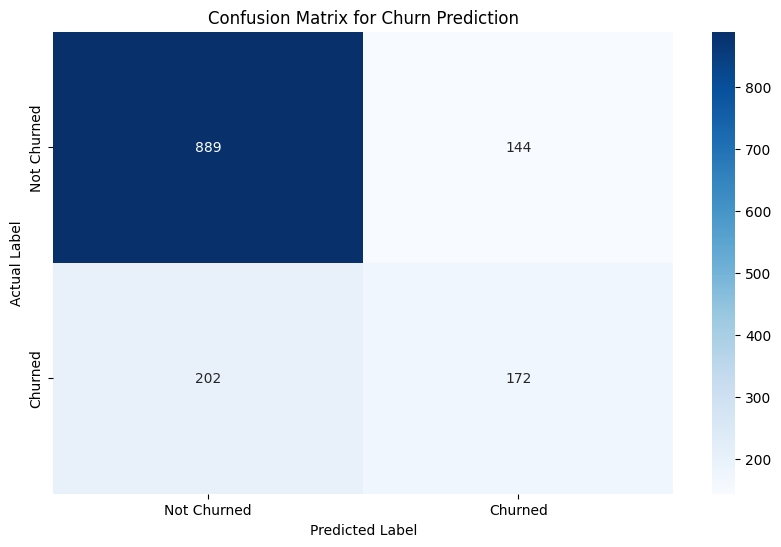


Precision Calculation Breakdown:
True Positives (TP): 172
False Positives (FP): 144
Precision = TP / (TP + FP) = 172 / (172 + 144) = 0.544

Precision by Class:
Not Churned (Class 0): 0.815
Churned (Class 1): 0.544

Additional Metrics:
Total Customers in Test Set: 1407
Actual Churn Rate: 26.58%
Predicted Churn Rate: 22.46%

Business Interpretation:
1. Precision for Churn Prediction:
   - When our model predicts a customer will churn, it is correct 54.4% of the time

2. Business Impact Analysis:
   - Potential savings from retained customers: $172,000
   - Cost of retention attempts: $31,600
   - Net benefit: $140,400


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load and prepare data
def prepare_churn_data():
    # Load telecom customer churn dataset
    df = pd.read_csv('https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv')
    
    # Basic data cleaning
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    df = df.dropna()
    
    # Convert target variable
    df['Churn'] = (df['Churn'] == 'Yes').astype(int)
    
    # Select and prepare features
    features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Contract', 'InternetService', 'PaymentMethod']
    X = pd.get_dummies(df[features])
    y = df['Churn']
    
    return X, y

# Train model and calculate precision
def calculate_precision():
    # Prepare data
    X, y = prepare_churn_data()
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train model
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Get confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate precision manually
    true_positives = cm[1][1]
    false_positives = cm[0][1]
    precision = true_positives / (true_positives + false_positives)
    
    return cm, precision, y_test, y_pred

# Visualize results
def visualize_results(cm, precision, y_test, y_pred):
    # Plot confusion matrix
    plt.figure(figsize=(10, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Churned', 'Churned'],
                yticklabels=['Not Churned', 'Churned'])
    plt.title('Confusion Matrix for Churn Prediction')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Print detailed precision analysis
    print("\nPrecision Calculation Breakdown:")
    print(f"True Positives (TP): {cm[1][1]}")
    print(f"False Positives (FP): {cm[0][1]}")
    print(f"Precision = TP / (TP + FP) = {cm[1][1]} / ({cm[1][1]} + {cm[0][1]}) = {precision:.3f}")
    
    # Calculate precision for each class
    class_0_precision = cm[0][0] / (cm[0][0] + cm[1][0])
    class_1_precision = cm[1][1] / (cm[1][1] + cm[0][1])
    
    print("\nPrecision by Class:")
    print(f"Not Churned (Class 0): {class_0_precision:.3f}")
    print(f"Churned (Class 1): {class_1_precision:.3f}")
    
    # Additional analysis
    total_predictions = len(y_test)
    churn_rate = sum(y_test) / total_predictions
    
    print("\nAdditional Metrics:")
    print(f"Total Customers in Test Set: {total_predictions}")
    print(f"Actual Churn Rate: {churn_rate:.2%}")
    print(f"Predicted Churn Rate: {sum(y_pred)/total_predictions:.2%}")

# Main execution
if __name__ == "__main__":
    # Calculate precision
    cm, precision, y_test, y_pred = calculate_precision()
    
    # Visualize and analyze results
    visualize_results(cm, precision, y_test, y_pred)
    
    # Business interpretation
    print("\nBusiness Interpretation:")
    print("1. Precision for Churn Prediction:")
    print(f"   - When our model predicts a customer will churn, it is correct {precision:.1%} of the time")
    
    # Cost-benefit analysis example
    avg_customer_value = 1000  # Example value in dollars
    retention_cost = 100       # Example cost per retention attempt
    
    true_positives = cm[1][1]
    false_positives = cm[0][1]
    
    potential_savings = true_positives * avg_customer_value
    retention_costs = (true_positives + false_positives) * retention_cost
    net_benefit = potential_savings - retention_costs
    
    print("\n2. Business Impact Analysis:")
    print(f"   - Potential savings from retained customers: ${potential_savings:,}")
    print(f"   - Cost of retention attempts: ${retention_costs:,}")
    print(f"   - Net benefit: ${net_benefit:,}")